In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.cluster import DBSCAN

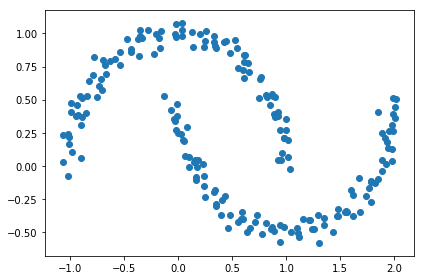

In [19]:
a, b = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(a[:, 0], a[:, 1])
plt.tight_layout()
plt.show()

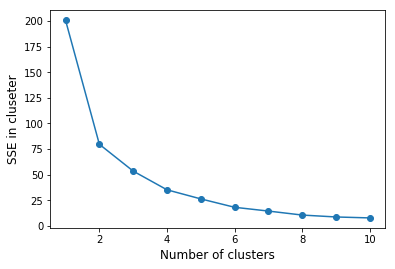

In [20]:
#エルボー法を使ってみる
distortions = []
for i in range(1, 11):
     km = KMeans(n_clusters = i,
                          init='random',#ランダムにクラスタの中心を選択
                          n_init=10,#異なる重心の初期値を用いたk-meansアルゴリズムの実行回数
                          max_iter=300,#k-meansアルゴリズム内部の最大イテレーション回数
                          random_state=0)#重心の初期化に用いる乱数生成器の状態
    
     km.fit(a)
     distortions.append(km.inertia_)#SSE(クラスタ内誤差平方和)は、inertia_属性を用いて確認できる

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('SSE in cluseter', fontsize=12)
plt.show()

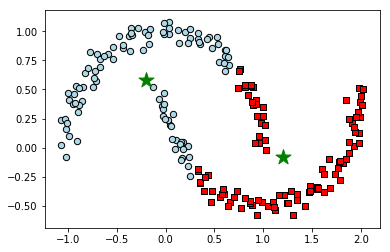

In [21]:
km = KMeans(n_clusters=2, init='random', random_state=0)
y_km = km.fit_predict(a)

plt.scatter(a[y_km == 0, 0], a[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(a[y_km == 1, 0], a[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
                  km.cluster_centers_[:, 1],
                  s=250,
                  marker='*',
                  c='green',
                  label='centroids')
plt.show()

In [6]:
#y_kmの要素の中で重複をなくす
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

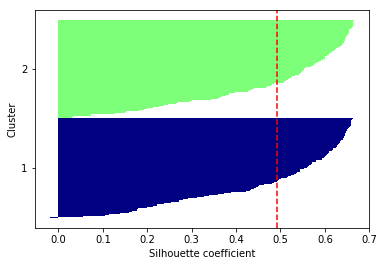

In [13]:
#各クラスタについて、データポイントごとにシルエット係数を計算する
silhouette_vals = silhouette_samples(a, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color  = cm.jet(float(i) / n_clusters)#色の値をセット
    plt.barh(range(y_ax_lower, y_ax_upper),#水平の棒グラフを描画（底辺の範囲を指定）
           c_silhouette_vals,#棒の幅を指定
           height=1.0,#棒の高さを指定
           edgecolor='none',#棒の端の色を指定
           color=color)#棒の色を指定
    
    #クラスタラベルの表示位置を追加
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    
    #底辺の値に棒の幅を追加
    y_ax_lower += len(c_silhouette_vals)
    
 #シルエット係数の平均値
silhouette_avg = np.mean(silhouette_vals)

#シルエット係数の平均値に破線をひく
plt.axvline(silhouette_avg, color='red', linestyle='--')

#y軸にクラスタラベルを表示する
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

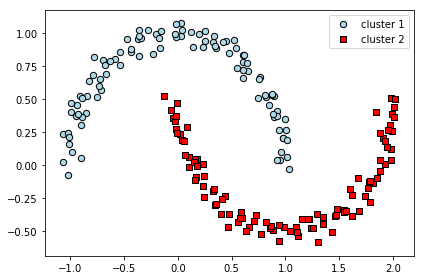

In [15]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(a)

plt.scatter(a[y_db == 0, 0], a[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(a[y_db == 1, 0], a[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()